In [33]:
! pip install transformers

In [34]:
! wget https://raw.githubusercontent.com/DriveMyScream/Python_libraries/main/helper_functions.py

--2024-04-14 15:44:11--  https://raw.githubusercontent.com/DriveMyScream/Python_libraries/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7752 (7.6K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]   7.57K  --.-KB/s    in 0s      

2024-04-14 15:44:12 (110 MB/s) - ‘helper_functions.py.1’ saved [7752/7752]



In [35]:
from helper_functions import (make_confusion_matrix, plot_loss_curves, calculate_results, plot_class_accuracy,
                              plot_prediction_confidence_histogram, create_tensorboard_callback)

In [36]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from transformers import pipeline
import pandas as pd

In [37]:
df = pd.read_csv("/content/news_category_classification.csv")

In [38]:
classifier = pipeline("text-classification", "DriveMyScream/bert-base-uncased-finetuned-news_category_classification", framework="tf")

config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some layers from the model checkpoint at DriveMyScream/bert-base-uncased-finetuned-news_category_classification were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at DriveMyScream/bert-base-uncased-finetuned-news_category_classification.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predict

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [39]:
new_df = df.sample(100)

In [42]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 209 to 1612
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  100 non-null    object
 1   category   100 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


In [40]:
# class_labels = ['fake', 'real']
# label2id = {'fake': 0, 'real': 1}
# id2label = {0: "fake", 1: "real"}
class_labels = {'education': 0, 'entertainment': 1, 'technology': 2, 'business': 3, 'sports': 4}

In [43]:
sentences_list = []
actual_labels = []
predicted_labels = []
probability_scores_list = []

for index, row in new_df.iterrows():
    text = row['headlines']
    label = class_labels[row['category']]
    result = classifier(text)[0]
    predicted_labels.append(class_labels[result['label']])
    actual_labels.append(label)
    sentences_list.append(text)
    probability_scores_list.append(result['score'])

In [44]:
true_value = np.array(actual_labels)
predicted_value = np.array(predicted_labels)

In [45]:
model_1_results = calculate_results(y_true = true_value,
                                    y_pred = predicted_value)
model_1_results

{'accuracy': 91.0,
 'precision': 0.9166266233766234,
 'recall': 0.91,
 'f1': 0.910680615376254}

Confusion Matrix


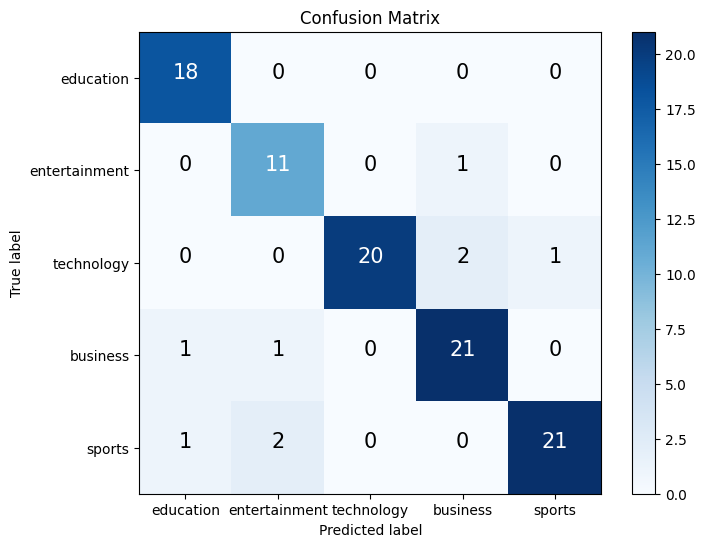

In [62]:
print("Confusion Matrix")
make_confusion_matrix(y_true = true_value,
                      y_pred = predicted_value,
                      classes = class_labels,
                      figsize = (8, 6))

In [63]:
print("Classification Report")
print(classification_report(true_value, predicted_value))

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.79      0.92      0.85        12
           2       1.00      0.87      0.93        23
           3       0.88      0.91      0.89        23
           4       0.95      0.88      0.91        24

    accuracy                           0.91       100
   macro avg       0.90      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



ClassWise Accuracy


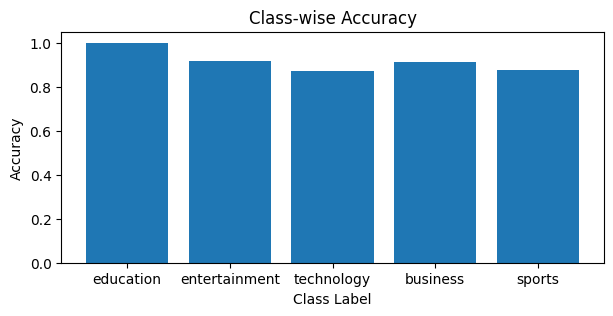

In [64]:
print("ClassWise Accuracy")
plot_class_accuracy(num_classes = 5,
                    y_true = true_value,
                    y_pred = predicted_value,
                    classes = class_labels,
                    figsize = (7, 3))

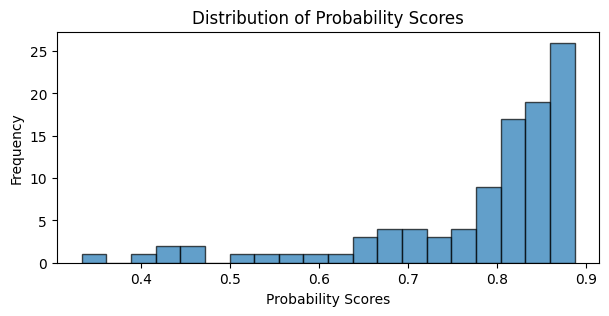

In [66]:
plt.figure(figsize=(7, 3))
plt.hist(probability_scores_list, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Probability Scores')
plt.ylabel('Frequency')
plt.title('Distribution of Probability Scores')
plt.show()

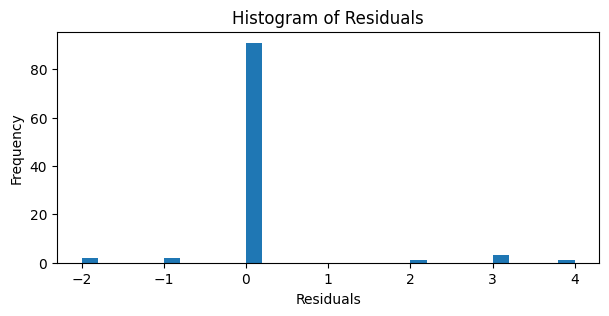

In [67]:
plt.figure(figsize=(7, 3))
residuals = true_value - predicted_value
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()